# 1.5.1 Capstone - Narrative analytics and experimentation

## About the dataset

This dataset includes taxi trips for 2016, reported to the City of Chicago in its role as a regulatory agency. To protect privacy but allow for aggregate analyses, the Taxi ID is consistent for any given taxi medallion number but does not show the number, Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes. Due to the data reporting process, not all trips are reported but the City believes that most are.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Importing data

In [2]:
df = pd.read_csv('chicago_taxi_trips_2016_12.csv')

## Exploring data

In [3]:
print('Shape:', df.shape)

Shape: (1245712, 20)


In [4]:
df.describe()

,taxi_id,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.245094e+06,1.245614e+06,1.245690e+06,0.0,787242.00000,1.131361e+06,1.111901e+06,1.245689e+06,1.245689e+06,1.245689e+06,1.245689e+06,1.245689e+06,671305.000000,1.131368e+06,1.131368e+06,1.113250e+06,1.113250e+06
mean,4.361896e+03,7.565623e+02,2.722639e+00,NaN,514.28259,2.281085e+01,2.106795e+01,1.240251e+01,1.376216e+00,4.248508e-03,9.401077e-01,1.481602e+01,83.407703,3.861354e+02,4.409327e+02,3.964387e+02,4.388257e+02
std,2.511681e+03,1.090555e+03,4.914539e+00,NaN,357.14152,1.879816e+01,1.694041e+01,2.153353e+01,2.654190e+00,1.260149e+00,1.523253e+01,2.784119e+01,38.243598,2.540746e+02,1.890504e+02,2.560480e+02,1.987694e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.00000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.229000e+03,3.600000e+02,4.000000e-01,NaN,225.00000,8.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,82.000000,1.700000e+02,3.460000e+02,1.700000e+02,2.700000e+02
50%,4.316000e+03,5.400000e+02,1.100000e+00,NaN,504.00000,2.400000e+01,1.600000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+00,101.000000,3.950000e+02,4.780000e+02,4.110000e+02,4.780000e+02
75%,6.524000e+03,9.000000e+02,2.400000e+00,NaN,807.00000,3.200000e+01,3.200000e+01,1.225000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.425000e+01,107.000000,6.040000e+02,6.100000e+02,6.810000e+02,6.100000e+02
max,8.760000e+03,8.634000e+04,9.000000e+02,NaN,1140.00000,7.700000e+01,7.700000e+01,9.026310e+03,4.220000e+02,8.000000e+02,6.666660e+03,9.026310e+03,118.000000,7.840000e+02,7.850000e+02,7.840000e+02,7.850000e+02


## Data composition

In [5]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,5240.0,2016-12-15 23:45:00,2016-12-16 00:00:00,900.0,2.5,NaN,307.0,8.0,32.0,10.75,2.45,0.0,1.0,14.70,Credit Card,NaN,754.0,410.0,64.0,231.0
1,1215.0,2016-12-12 07:15:00,2016-12-12 07:15:00,240.0,0.4,NaN,40.0,28.0,28.0,5.00,3.00,0.0,1.0,9.50,Credit Card,NaN,395.0,408.0,395.0,408.0
2,3673.0,2016-12-16 16:30:00,2016-12-16 17:00:00,2400.0,10.7,NaN,NaN,32.0,NaN,31.00,0.00,0.0,0.0,31.00,Cash,NaN,385.0,478.0,NaN,NaN
3,5400.0,2016-12-16 08:45:00,2016-12-16 09:00:00,300.0,0.0,NaN,787.0,8.0,8.0,5.25,2.00,0.0,0.0,7.25,Credit Card,101.0,688.0,206.0,161.0,649.0
4,1257.0,2016-12-3 18:45:00,2016-12-3 18:45:00,360.0,0.3,NaN,534.0,7.0,8.0,5.00,0.00,0.0,0.0,5.00,Cash,3.0,618.0,407.0,454.0,453.0


## Trip total

In [6]:
tt = df.trip_total.value_counts()
tt[:100]

8.00      34073
7.50      33439
7.75      33390
7.00      32997
8.25      32543
7.25      32381
8.50      32027
6.75      31294
8.75      30886
6.50      30499
9.00      30355
6.25      29124
9.25      28614
6.00      28281
9.50      26726
10.00     26626
5.75      25997
9.75      25794
3.25      23978
5.50      23684
10.25     23073
10.50     21892
5.25      21161
10.75     20445
11.00     19624
5.00      18484
11.25     18076
11.50     16596
11.75     15617
12.00     15257
          ...  
19.06        69
9.30         69
65.75        69
8.05         68
90.00        68
64.75        68
11.60        68
62.80        68
73.50        68
31.10        68
67.25        67
68.50        67
67.75        67
10.20        67
35.30        67
58.31        67
67.00        67
81.00        67
30.20        66
48.40        66
35.90        66
26.55        66
9.90         66
8.70         66
64.35        66
69.75        65
75.50        65
26.85        65
62.90        65
100.00       65
Name: trip_total, Length

In [7]:
df.trip_total.describe()

count    1.245689e+06
mean     1.481602e+01
std      2.784119e+01
min      0.000000e+00
25%      7.000000e+00
50%      9.500000e+00
75%      1.425000e+01
max      9.026310e+03
Name: trip_total, dtype: float64

In [8]:
print('No value rows in trip value column:', df['trip_total'].isnull().sum())
print('No value rows in payment type column:', df['payment_type'].isnull().sum())

No value rows in trip value column: 23
No value rows in payment type column: 0


In [9]:
#Dropping no value rows in trip total column
df.dropna(subset=['trip_total'], inplace=True)

In [10]:
df.shape

(1245689, 20)

In [11]:
print("Description of distribuition")
print(df.trip_total.describe().apply(lambda x: format(x, 'f')))

Description of distribuition
count    1245689.000000
mean          14.816016
std           27.841188
min            0.000000
25%            7.000000
50%            9.500000
75%           14.250000
max         9026.310000
Name: trip_total, dtype: object


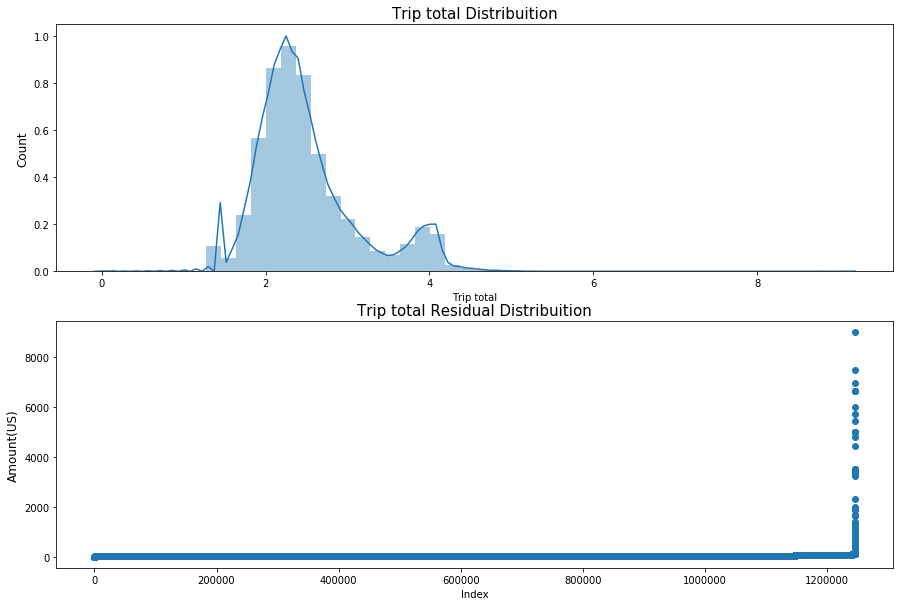

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)

g = sns.distplot(np.log(df.trip_total +1))

g.set_title('Trip total Distribuition', fontsize=15)
g.set_xlabel('Trip total')
g.set_ylabel('Count', fontsize=12)

plt.subplot(2,1,2)
g2 = plt.scatter(range(df.shape[0]), np.sort(df.trip_total.values))
g2= plt.title('Trip total Residual Distribuition', fontsize=15)
g2 = plt.xlabel('Index')
g2 = plt.ylabel('Amount(US)', fontsize=12)

plt.show()

### Research proposal

Do taxi users use both credit cards and cash payment options for similar trip values?

 ### Hypothesis

I expect to see a that users pick the cash option for trip values lower amounts (such as $50), and use credit cards for higher amounts.

### Method of Testing

I'm going to use two columns: trip value and payment type. With these I'll create two new data frames, target_ca and target_cc, referring to those operations payed with credit card and cash respectively. Will observe a total of 1,245,712 operations, distribute them among trip values, analize each data frame's description in relation to the trip values and compare both of these sets of populations.

## Outcome

Using plots will understand the data, and running a T-test will ensure us that there is a statistical difference or not between both populations.

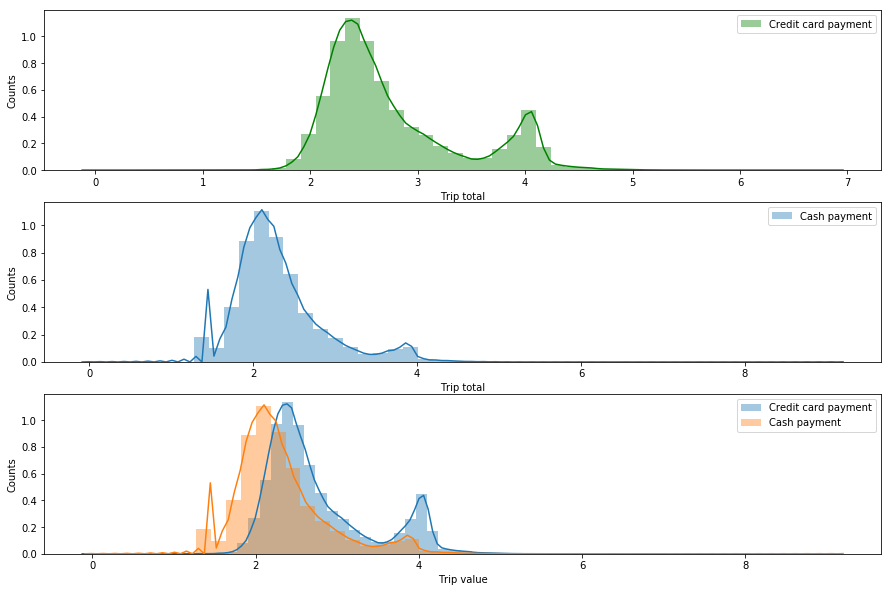

In [13]:
# Sort the dataframe by target
target_cc = df.loc[df['payment_type'] == 'Credit Card']
target_ca = df.loc[df['payment_type'] == 'Cash']

plt.figure(figsize=(15,10))

plt.subplot(311)
sns.distplot(np.log(target_cc[['trip_total']] + 1), color='g', label='Credit card payment')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Trip total')

plt.subplot(312)
sns.distplot(np.log(target_ca[['trip_total']] + 1), label='Cash payment')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Trip total')

plt.subplot(313)
sns.distplot(np.log(target_cc[['trip_total']] + 1), label='Credit card payment')
sns.distplot(np.log(target_ca[['trip_total']] + 1), label='Cash payment')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Trip value')
plt.show()

In [14]:
target_cc[['trip_total']].describe()

,trip_total
count,523461.000000
mean,19.408932
std,18.050859
min,0.000000
25%,9.000000
50%,11.750000
75%,19.800000
max,929.000000


In [15]:
target_ca[['trip_total']].describe()

,trip_total
count,711434.000000
mean,11.452534
std,32.792418
min,0.000000
25%,6.000000
50%,8.000000
75%,11.250000
max,9026.310000


In [16]:
print('Credit card shape:', target_cc[['trip_total']].shape)
print('Cash shape:', target_ca[['trip_total']].shape)

Credit card shape: (523461, 1)
Cash shape: (711434, 1)


In [17]:
stats.ttest_ind(target_cc[['trip_total']], target_ca[['trip_total']], equal_var=False)

Ttest_indResult(statistic=array([ 172.23521627]), pvalue=array([ 0.]))

## Conclusion

Our p-value was not low. From the description of both new data frames we see that the mean trip value payed with credit card was US 19.41 and with cash US 11.45. Comparing the distribution plots, we visually confirm the latter. We can conclude that there is no significant difference in the use of payment types according to the trip value, which certainly surprises me. A further analysis could include what is the frequency of the use of cash at night times compared to day times.